In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_columns = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
def column_description(column_name):    
    print(df_columns['Description'].loc[column_name])

In [4]:
column_description('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


## Explore each feature:

**loan_amnt :** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**term :** The number of payments on the loan. Values are in months and can be either 36 or 60.

**int_rate :** Interest Rate on the loan.

**installment :** The monthly payment owed by the borrower if the loan originates.

**grade :** LC assigned loan grade.

**sub_grade :** LC assigned loan subgrade.

**emp_title :** The job title supplied by the Borrower when applying for the loan.

**emp_length :** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**home_ownership :** The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.

**annual_inc :** The self-reported annual income provided by the borrower during registration.

**verification_status :** Indicates if income was verified by LC, not verified, or if the income source was verified.

**issue_d :** The month which the loan was funded.

**loan_status :** Current status of the loan.

**purpose :** A category provided by the borrower for the loan request.

**title :** The loan title provided by the borrower.

**dti :** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**earliest_cr_line :** The month the borrower's earliest reported credit line was opened.

**open_acc :** The number of open credit lines in the borrower's credit file.

**pub_rec :** Number of derogatory public records.

**revol_bal :** Total credit revolving balance.

**revol_util :** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_acc :** The total number of credit lines currently in the borrower's credit file.

**initial_list_status :** The initial listing status of the loan. Possible values are – W, F.

**application_type :** Indicates whether the loan is an individual application or a joint application with two co-borrowers.

**mort_acc :** Number of mortgage accounts.

**pub_rec_bankruptcies :** Number of public record bankruptcies.

**zip_code :** The first 3 numbers of the zip code provided by the borrower in the loan application.


In [5]:
df = pd.read_csv('lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

**Since our label icludes two categories of "Fully Paid" and "Charged Off", we're dealing with a binary classification problem.**

# EDA

[Text(0.5, 1.0, 'Number of Fully Paid instances vs. Charged Off instances')]

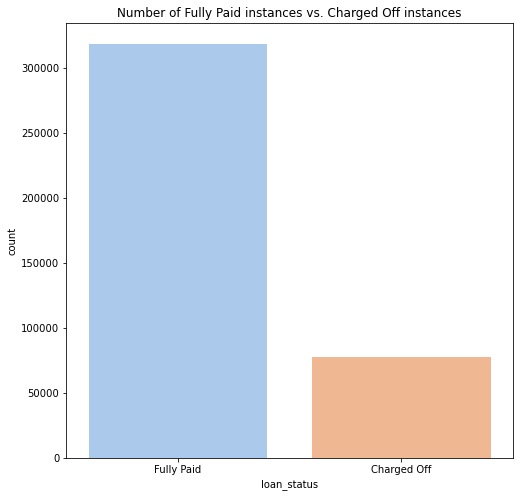

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x='loan_status',data=df,palette='pastel').set(title='Number of Fully Paid instances vs. Charged Off instances')

**It looks like our label is not balanced, because number of "fully paid" instances are way more than "charged off" instances.**

(0.0, 45000.0)

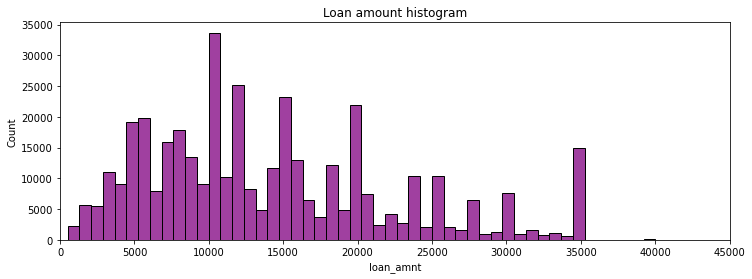

In [11]:
plt.figure(figsize=(12,4))
sns.histplot(x='loan_amnt', data=df, bins=50, color='purple').set(title='Loan amount histogram')
plt.xlim(0,45000)

**Correlation betwen numerical variable features.**

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

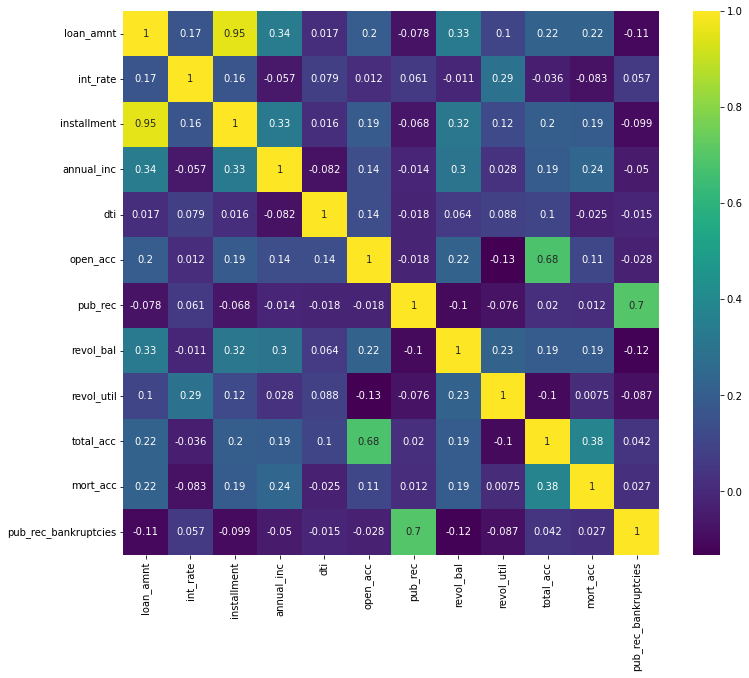

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

**It looks like there's a very good correlation between the 'installment' and 'loan amount'.**

In [14]:
column_description('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
column_description('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

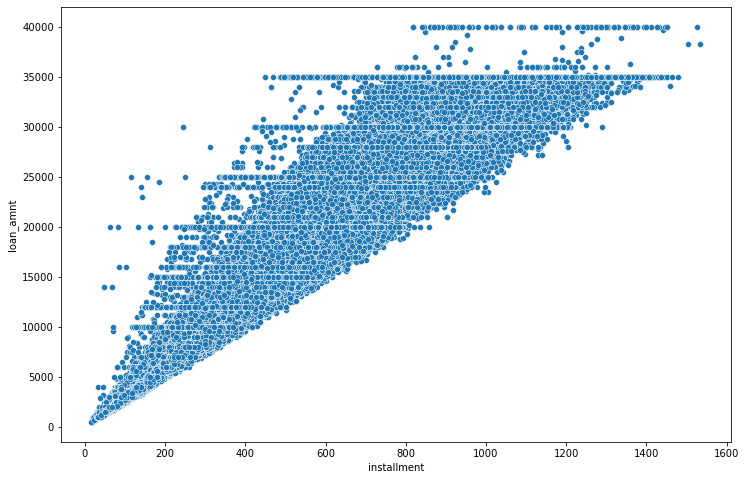

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

**High correlation makes sense because the higher the amount of loan, the higher would be monthly payments(installment).**

[Text(0.5, 1.0, 'Loan amount vs. Loan status')]

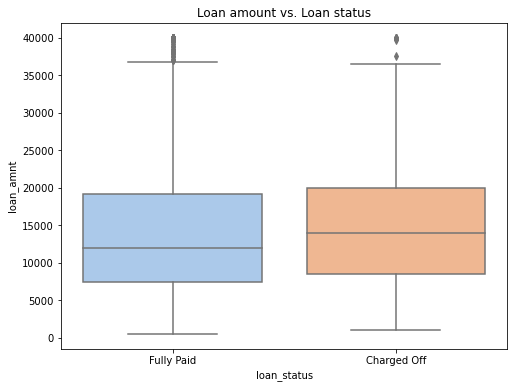

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='pastel').set(title='Loan amount vs. Loan status')

**They look to be similar, but it shows that if the amount of loan is higher there is a slight chance for it to be charged off.**

**Summary statistics for loan amount grouped by loan status.**

In [18]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**It again indicates that the average of loan amount for people who are not able to pay their loan back is slightly higher than the average of loan amount for people who actually fully paid their loan.**

**Explore 'Grade' and 'SubGrade' columns that are attributed to loans.**

In [19]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [20]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

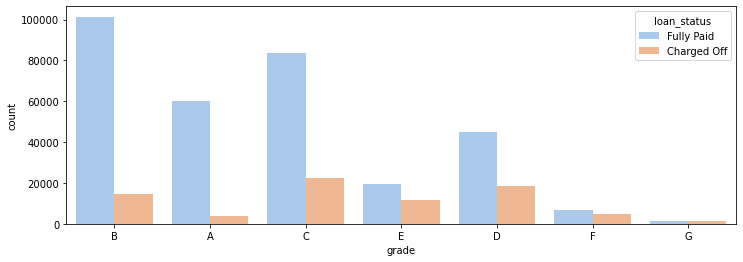

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='grade', hue='loan_status', data=df, palette='pastel')

**We may need to reorder these grade, as it shows increase in number of charged off based on categories from A to G.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

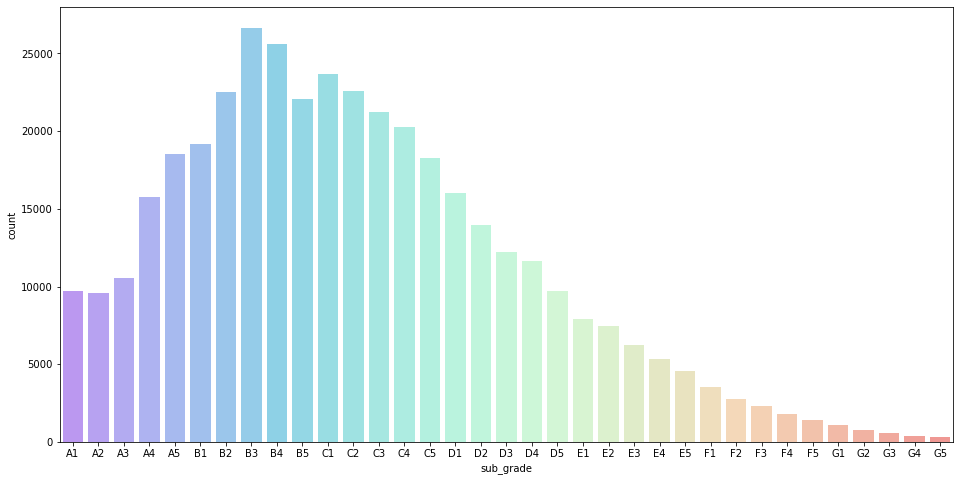

In [22]:
plt.figure(figsize=(16,8))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade' ,order=subgrade_order, palette='rainbow', alpha=0.5, data =df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

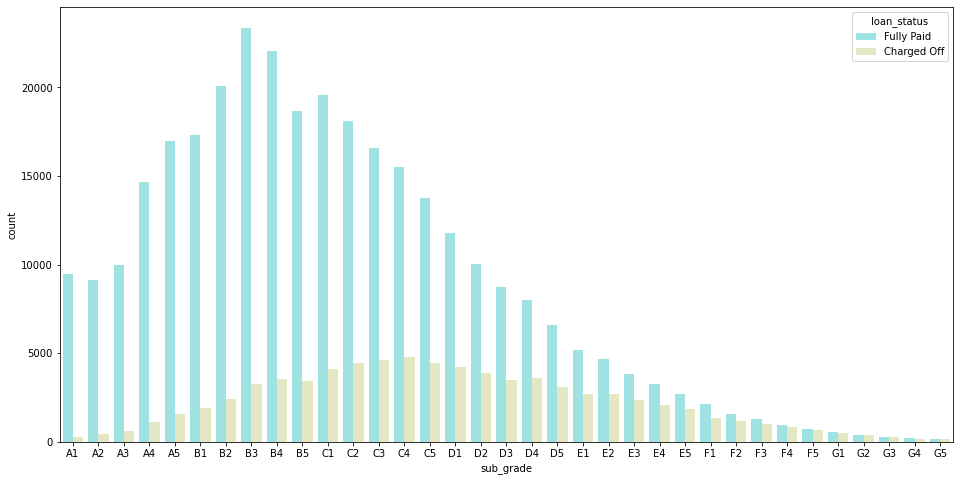

In [23]:
plt.figure(figsize=(16,8))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', order=subgrade_order, palette='rainbow', alpha=0.5, hue='loan_status',data=df)

**It looks like as we get closer the grade G it gets riskier because the chance of loan getting paid is almost the same as loan being charged off.**

**Plotting again for only F and G subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

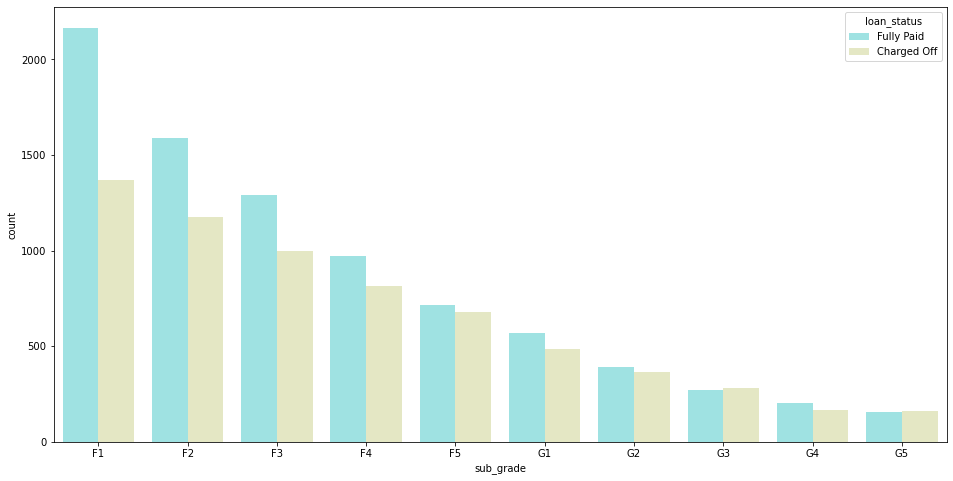

In [24]:
f_and_g_subgrades = df[(df['grade']== 'F') | (df['grade']== 'G')]
plt.figure(figsize=(16,8))
subgrade_order = sorted(f_and_g_subgrades['sub_grade'].unique())
sns.countplot(x='sub_grade', order=subgrade_order, palette='rainbow', alpha=0.5, hue='loan_status',data=f_and_g_subgrades)

**We can observe the riskiest section of subgrade and at grade G5 it is almost the same chance whether someone pay their loan or charge off.**

In [25]:
df['loan_repaid'] = pd.get_dummies(df['loan_status'],drop_first=True)

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


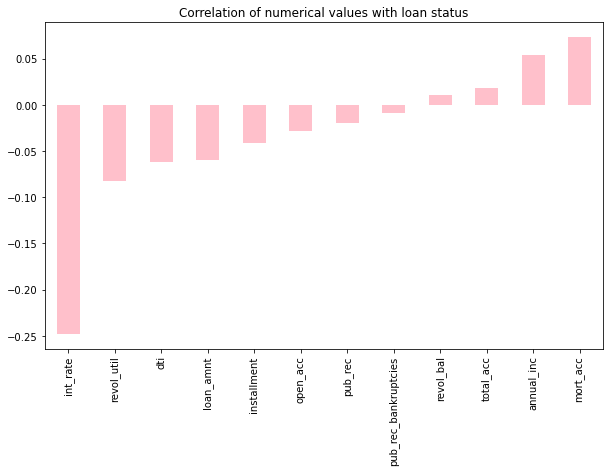

In [27]:
plt.figure(figsize=(10,6))
loan_status_corr = df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar',color='pink').set(title='Correlation of numerical values with loan status')

**We can see that the interest rate has the highest negative correlation, and that makes sense because if interest rate is really high it will be harder to pay off the loan.**

# Data Preprocessing

**Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

In [28]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


# Missing Data

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Percentage of missing data on each column.**

In [30]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examine emp_title and emp_length to see whether it will be okay to drop them.**

In [31]:
column_description('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [32]:
column_description('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [33]:
df['emp_title'].nunique()

173105

**There are too many unique string values to be able to convert them to dummy variable.**

In [34]:
df.drop('emp_title', axis=1, inplace=True)

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length_sorted = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

[Text(0.5, 1.0, 'number of each employment length')]

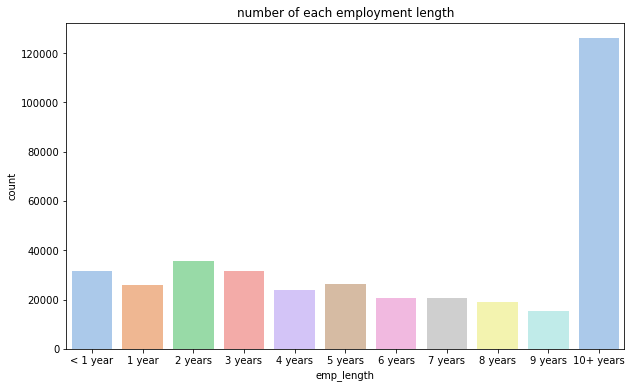

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=df, order=emp_length_sorted, palette='pastel').set(title='number of each employment length')

[Text(0.5, 1.0, 'Number of each employment length for fully paid or charged off loan status')]

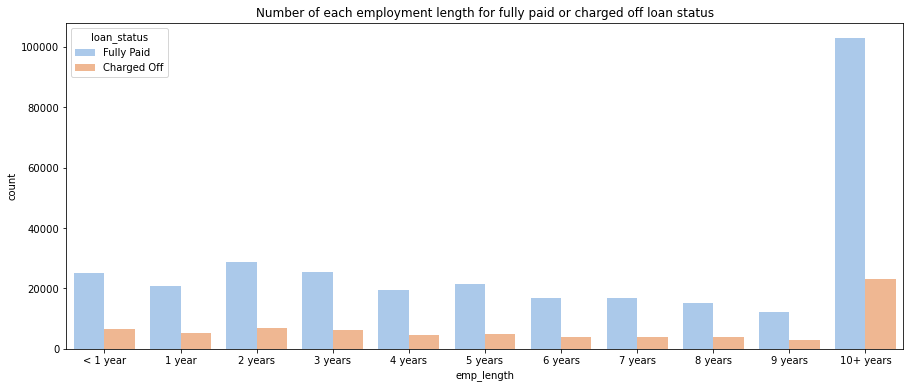

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x='emp_length', data=df, order=emp_length_sorted, palette='pastel',hue='loan_status').set(title='Number of each employment length for fully paid or charged off loan status')

**If the ratio between 'Fully Paid' bar to 'Charged Off' bar is almost the same for all categories, this column wouldn't be a very informative feature so it could be dropped.**

[Text(0.5, 1.0, 'Ratio between Charged off and fully paid for each employment length.')]

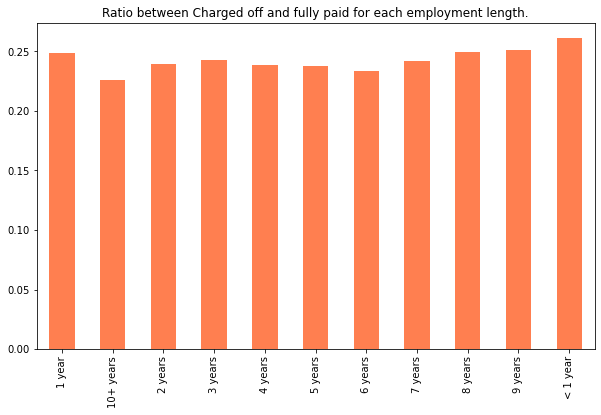

In [39]:
plt.figure(figsize=(10,6))
(df['emp_length'][df['loan_status'] == 'Charged Off'].value_counts() / df['emp_length'][df['loan_status'] == 'Fully Paid'].value_counts()).plot(kind='bar', color='coral').set(title='Ratio between Charged off and fully paid for each employment length.')

**Charge off rates are extremely similar across all employment lengths. So they are not informative information.**

In [40]:
df.drop('emp_length', axis=1, inplace=True)

In [41]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [42]:
column_description('purpose')

A category provided by the borrower for the loan request. 


In [43]:
column_description('title')

The loan title provided by the borrower


**The title column is simply a string subcategory/description of the purpose column.**

In [44]:
df.drop('title', axis=1, inplace=True)

In [45]:
column_description('mort_acc')

Number of mortgage accounts.


In [46]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**Find a column that is most correlated to mortgage accounts feature.**

In [47]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc.**

In [48]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [49]:
average_mort_per_total_acc = df.groupby('total_acc')['mort_acc'].mean()

In [50]:
def fill_null(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return average_mort_per_total_acc[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc'] = df.apply(lambda x: fill_null(x['total_acc'], x['mort_acc']), axis=1)

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Rows including those missing values need to be dropped.**

In [53]:
df.dropna(axis=0,inplace=True)

In [54]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables

In [55]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

## Term feature

In [56]:
column_description('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [57]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [58]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

## Grade and Subgrade features

In [59]:
column_description('grade')

LC assigned loan grade


In [60]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

**Grade is part of the subgrade so it could be dropped.**

In [61]:
df.drop('grade', axis=1, inplace=True)

In [62]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [63]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies], axis=1)

In [64]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

## Verification Status, Application Type, Initial List Status, Purpose

In [65]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [66]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [67]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [68]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [69]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

In [70]:
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies],axis=1)

## Home Ownership feature

In [71]:
column_description('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [72]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**We can replace 'None' and 'Any' with 'Other' and end up with 4 categories.**

In [73]:
df['home_ownership'].replace(['ANY','NONE'], 'OTHER', inplace=True)

In [74]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [75]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [76]:
df = pd.concat([df.drop('home_ownership', axis=1), home_ownership_dummies], axis=1)

## Address feature

In [77]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [78]:
df['zipcode'] = df['address'].apply(lambda add: add[-5:])

In [79]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [80]:
zip_dummies = pd.get_dummies(df['zipcode'], drop_first=True)
df = pd.concat([df.drop(['zipcode', 'address'],axis=1), zip_dummies], axis=1)

## Issued date feature

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date.**

In [81]:
df.drop('issue_d', axis=1, inplace=True)

## Earliest Credit Line feature

In [82]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [83]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [84]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '226

## Loan Status 

**Since already have loan_repaid column this is a duplicate and needs to be dropped.**

In [85]:
df.drop('loan_status', axis=1, inplace=True)

## Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
model = Sequential()

# input layer
model.add(Dense(units=78, activation='relu'))
model.add(Dropout(rate=0.2))

# hidden layer
model.add(Dense(units=39, activation='relu'))
model.add(Dropout(rate=0.2))

# hidden layer
model.add(Dense(units=19, activation='relu'))
model.add(Dropout(rate=0.2))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 5)

## Train the Data

In [93]:
model.fit(x=X_train, y=y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/50
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3052 - val_loss: 0.2649
Epoch 2/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2664 - val_loss: 0.2630
Epoch 3/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2634 - val_loss: 0.2629
Epoch 4/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2619 - val_loss: 0.2634
Epoch 5/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2610 - val_loss: 0.2619
Epoch 6/50
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2606 - val_loss: 0.2623
Epoch 7/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2601 - val_loss: 0.2615
Epoch 8/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2594 - val_loss: 0.2616
Epoch 9/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2593 - val_loss: 0.2617
Epoch 10/50
1236/1236 [==============================] - 3s 2ms/step - loss: 0.259

# Evaluating the Model Performance

In [94]:
losses = pd.DataFrame(model.history.history)

[Text(0.5, 1.0, 'The validation loss versus the training loss')]

<Figure size 720x432 with 0 Axes>

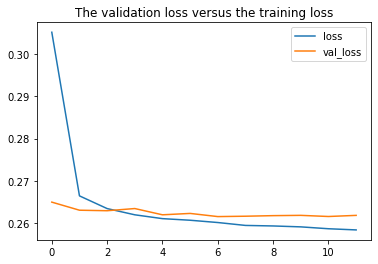

In [95]:
plt.figure(figsize=(10,6))
losses.plot().set(title='The validation loss versus the training loss')


**Since we are dealing with a binary classification problem, we can evaluate our model using confusion matrix and classification report.**

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)

2471/2471 [==============================] - 2s 821us/step


In [98]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 6761  8897]
 [   23 63363]]


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**Considering the fact that our dadaset is unbalanced and almost 80% of are dataset belongs to 'Fully Paid' data points, we cannot really rely on accuracy which is 89%. F1-Score seems to be OK.**
